# Lab 03: Loss and Error Rate - Exercise

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint
import utils

### Download the CIFAR dataset -- check the size carefully! 

In [2]:
data_path = "/Users/dongdongdongdong/Desktop/data/cifar"

train_data = torch.load(data_path + "/train_data.pt")
train_label = torch.load(data_path + "/train_label.pt")
test_data = torch.load(data_path + "/test_data.pt")
test_label = torch.load(data_path + "/test_label.pt")

In [3]:
train_data.shape, train_label.shape

(torch.Size([50000, 3, 32, 32]), torch.Size([50000]))

In [4]:
test_data.shape, test_label.shape

(torch.Size([10000, 3, 32, 32]), torch.Size([10000]))

### Make a ONE layer net class

In [5]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net, self).__init__()
        self.linear_layer = nn.Linear(input_size, output_size, bias=True)
        
    def forward(self, x):
        scores = self.linear_layer(x)
        return scores

### Build the net. 

### We are dealing with RGB pictures that are 3 x 32 x 32 

### On picture contains a total of 3 x 32 x 32 = 3072 values

In [6]:
net = one_layer_net(3*32*32, 10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=3072, out_features=10, bias=True)
)


### Choose the criterion and optimizer. Also choose:

### batchsize = 20

### learning rate = 0.01

In [7]:
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

bs = 20

### Do 40 passes through the training set (which contains 50,000 images -- not 60,000 like mnist!)

In [8]:
for epoch in range(40):
    
    running_loss = 0.0
    running_error = 0
    num_batches = 0
    
    shuffled_indices = torch.randperm(50000)
    
    for i in range(0, 50000, bs):
        
        optimizer.zero_grad()
        
        indices = shuffled_indices[i : i+bs]
        minibatch_data = train_data[indices]
        minibatch_label = train_label[indices]
        
        inputs = minibatch_data.view(bs, 3*32*32)
        inputs.requires_grad_()
        
        scores = net(inputs)
        loss = criterion(scores, minibatch_label)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.detach().item()
        error = utils.get_error(scores.detach(), minibatch_label)
        running_error += error.item()
        num_batches += 1
        
    total_loss = running_loss / num_batches
    total_error = running_error / num_batches
    print("Epoch: {}, Loss: {}, Error: {}%".format(
        epoch, total_loss, total_error))

Epoch: 0, Loss: 1.9590717582702637, Error: 0.6960799994707108%
Epoch: 1, Loss: 1.863969122505188, Error: 0.6532799997568131%
Epoch: 2, Loss: 1.8400932030677795, Error: 0.6423799999237061%
Epoch: 3, Loss: 1.8207600347042083, Error: 0.6340400002002716%
Epoch: 4, Loss: 1.806612707090378, Error: 0.6289000003814698%
Epoch: 5, Loss: 1.7960724976062774, Error: 0.6239799997329712%
Epoch: 6, Loss: 1.7891706563472747, Error: 0.6182200003862381%
Epoch: 7, Loss: 1.7873125874519349, Error: 0.6212600001573563%
Epoch: 8, Loss: 1.7791027079820634, Error: 0.6160800003051757%
Epoch: 9, Loss: 1.7784477504253386, Error: 0.6152399996757507%
Epoch: 10, Loss: 1.770088053870201, Error: 0.6129799998521804%
Epoch: 11, Loss: 1.767017917251587, Error: 0.6118799999475479%
Epoch: 12, Loss: 1.764296488571167, Error: 0.610080000114441%
Epoch: 13, Loss: 1.7621074593305588, Error: 0.6083600003242493%
Epoch: 14, Loss: 1.7539345767736434, Error: 0.6040599998474121%
Epoch: 15, Loss: 1.7558527131080628, Error: 0.6051799998

### Choose an image at random from the test set and see how good/bad are the predictions

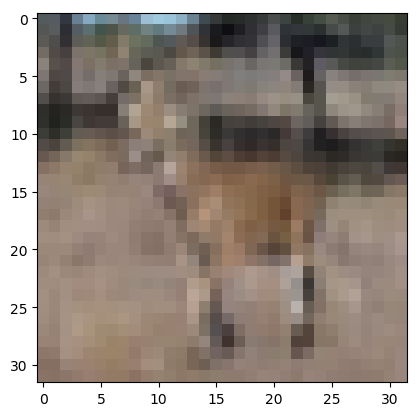

In [13]:
idx = randint(0, 10000-1)
im = test_data[idx]

utils.show(im)

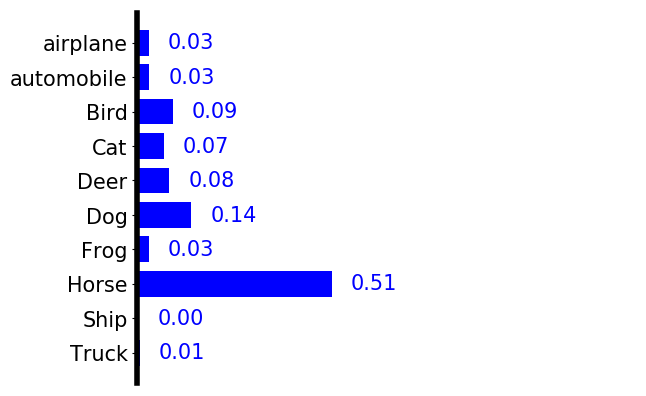

In [14]:
scores = net(im.view(1, 3*32*32))
probs = F.softmax(scores, dim=1)
utils.show_prob_cifar(probs)